
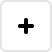
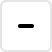
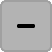
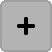
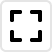
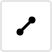
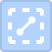
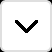
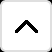
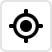
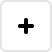
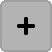
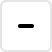
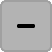
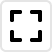
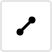
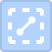
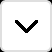
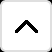
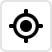

In [1]:
import numpy as np
import pandas as pd

from lets_plot.mapping import as_discrete
from lets_plot import *

LetsPlot.setup_html()

# override_aes in guide_legend()¶
The `override_aes` parameter can be used to specify aesthetic parameters of legend keys

## Demo

In [2]:
mpg = pd.read_csv ("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")

In [3]:
# By default alpha is not applied to the legend.

base_mpg_plot = ggplot(mpg, aes('displ', 'hwy', color='drv')) + \
    geom_point(size=4, alpha=0.2, stroke=0)
base_mpg_plot

In [4]:
# Applying alpha and size for better look.

base_mpg_plot + guides(color=guide_legend(override_aes={'alpha': 0.4, 'size': 8}))

## Experiments with parameters

In [5]:
np.random.seed(1)

n = 4
x = list(range(n))
y = np.random.rand(n)
v = np.random.rand(n)
data = {'x': x, 'y': y, 'v': v}

In [6]:
# Base plot
p = ggplot(data, aes('x', 'y')) + geom_point(aes(color=as_discrete('x'))) + ggsize(400, 200)
p

In [7]:
# Specifying common aesthetics for all the legend labels.

p + guides(color=guide_legend(
    override_aes=dict(shape=22, size=8, stroke=1.8, fill='light-grey', alpha=0.6)
))

In [8]:
# Using a list of values.

p + guides(color=guide_legend(
    override_aes=dict(color=['red', 'blue', 'green', 'pink'])
))

In [9]:
# Use 'None' to keep the original value.

p + guides(color=guide_legend(
    override_aes=dict(color=['red', None, 'green', None])
))

In [10]:
# Using a list that is smaller than the number of legend keys.
# The last value spreads to the rest of the keys.

p + guides(color=guide_legend(
    override_aes=dict(color=['grey'], size=[10, 8])
))

In [11]:
# Using a list that is smaller than the number of legend keys.
# 'None' can be used to stop value propagation; the rest keys will get their original values.

p + guides(color=guide_legend(
    override_aes=dict(color=['grey', None], size=[10, None, 8])
))

## Reproduced an example from [rbind.io](https://aosmith.rbind.io/2020/07/09/ggplot2-override-aes/)


In [12]:
dat = pd.DataFrame({
    'g1': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'g2': ['Control', 'Control', 'Treatment', 'Treatment', 'Control', 'Control', 'Treatment', 'Treatment', 'Control', 'Control', 'Treatment', 'Treatment', 'Control', 'Control', 'Treatment', 'Treatment'],
    'x': [0.42, 0.39, 0.56, 0.59, 0.17, 0.95, 0.85, 0.25, 0.31, 0.75, 0.58, 0.9, 0.6, 0.86, 0.61, 0.61],
    'y': [-1.4, 3.6, 1.1, -0.1, 0.5, 0, -1.8, 0.8, -1.1, -0.6, 0.2, 0.3, 1.1, 1.6, 0.9, -0.6]
})

bp = ggplot(dat, aes('x', 'y', color='g1', shape='g2')) + \
    geom_point(size=5, alpha=0.6)
bp

In [13]:
# Customized scales and default legend do not correspond well.

cp = ggplot(dat, aes(x='x', y='y', fill='g1', shape='g2')) + \
    geom_point(size=5, color='black') + \
    scale_fill_manual(values=["#002F70", "#EDB4B5"]) + \
    scale_shape_manual(values=[21, 24])
cp

In [14]:
# This can be fixed via override_aes.

cp + guides(
    fill=guide_legend(override_aes={'shape': 21}),
    shape=guide_legend(override_aes={'fill': 'black'})
)


## Testing

In [15]:
# `fill` and `size` are mapped to the same variable. 
# The result is not defined if the same legend is set via different aesthetics.

pie_plot = ggplot({'n': ['a', 'b', 'c']}) + geom_pie(aes(fill='n', size='n'), stat='identity')
gggrid([
    pie_plot,
    pie_plot + guides(
        fill=guide_legend(override_aes=dict(color='blue')),
        size=guide_legend(override_aes=dict(stroke=4, color='black'))
    )
]) + ggsize(800, 300)

In [16]:
# Verifying different aesthetics

p + guides(color=guide_legend(override_aes=dict(
    color=['red', 'blue', 'green', 'pink'], 
    shape=22, 
    size=8, 
    stroke=1.8, 
    fill='white', 
    alpha=0.4
)))

In [17]:
# An empty dictionary

p + guides(color=guide_legend(override_aes={}))

In [18]:
# Invalid or 'None' values

p + guides(color=guide_legend(override_aes=dict(color=[None], shape=-11, size=0, stroke=-2)))

In [19]:
# An empty list of values

p + guides(color=guide_legend(override_aes=dict(color=[])))

In [20]:
# `override_aes` in the case when some legend labels are combined into one;
# see issue https://github.com/JetBrains/lets-plot/issues/1129 for details.

df = pd.DataFrame({
    'category': ['A', 'B', 'C', 'D'],
    'value': [10, 15, 20, 25]
})

ggplot(df) + ggsize(400,200) + \
    geom_point(aes(x='category', y='value', color='category')) + \
    scale_color_manual(values=['red', 'blue', 'green', 'black'], labels=['Label A', 'Label B', 'Label C', 'Label C']) + \
    guides(color = guide_legend(override_aes=dict(color=['pink', 'gray', 'green', 'orange'])))


## Custom legend

In [21]:
# Verifying how `overrides_aes` works for custom legends.
# Note that the same effect can be achieved easier by using direct parameters.

m_plot = ggplot(data, aes('x', 'y')) + \
    geom_point(manual_key="Point") + \
    geom_line(manual_key="Line") 

gggrid([
    m_plot,
    m_plot + guides(manual=guide_legend(override_aes=dict(size=6))),
    m_plot + guides(manual=guide_legend(override_aes=dict(size=[6, 2], color=['red', 'blue'])))
]) + ggsize(900, 200)

In [22]:
# Changing the order in the legend via `index` in `layer_key`

m_plot2 =  ggplot(data, aes('x', 'y')) + \
    geom_point(manual_key=layer_key("Point", index = 1)) + \
    geom_line(manual_key=layer_key("Line", index = 0))

gggrid([
    m_plot2,
    m_plot2 + guides(manual=guide_legend(override_aes=dict(size=[2], color=['red', 'blue'])))
]) + ggsize(600, 200)
